In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
gold = yf.Ticker('Gold')
google = yf.Ticker('GOOG')

In [4]:
interval = '1d'
start = '2023-1-1'
end = '2024-1-1'

In [5]:
gold_df = gold.history(interval='1d',start=start,end=end)
google_df = google.history(interval='1d',start=start,end=end)

In [6]:
gold_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03,17.004981,17.402475,16.917727,17.286135,16347400,0.0,0
2023-01-04,17.596371,18.478614,17.557593,18.304104,29096000,0.0,0
2023-01-05,18.071426,18.255631,17.780578,18.207157,17933600,0.0,0
2023-01-06,18.517396,18.585260,17.955088,18.459227,21704000,0.0,0
2023-01-09,18.633736,18.779162,18.381666,18.391361,18346700,0.0,0


In [7]:
google_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,20738500,0,0
2023-01-04,91.010002,91.239998,87.800003,88.709999,27046500,0,0
2023-01-05,88.070000,88.209999,86.559998,86.769997,23136100,0,0
2023-01-06,87.360001,88.470001,85.570000,88.160004,26612600,0,0
2023-01-09,89.195000,90.830002,88.580002,88.800003,22996700,0,0


In [8]:
gold_ret = np.log(gold_df['Close']).diff(periods=1).dropna().values
google_ret = np.log(google_df['Close']).diff(periods=1).dropna().values

In [9]:
# gold_ret = gold_df['Close'].pct_change().dropna().values
# google_ret = google_df['Close'].pct_change().dropna().values

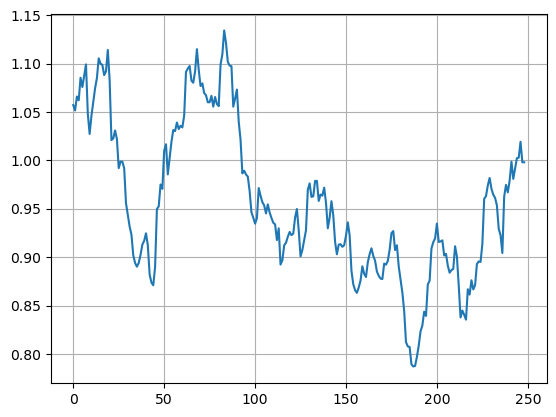

In [10]:
gold_portfolio = gold_ret + 1
plt.grid(True)
plt.plot(np.cumprod(gold_portfolio));

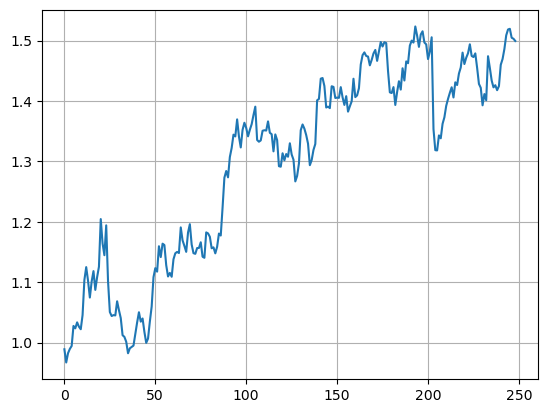

In [11]:
google_portfolio = google_ret + 1
plt.grid(True)
plt.plot(np.cumprod(google_portfolio));

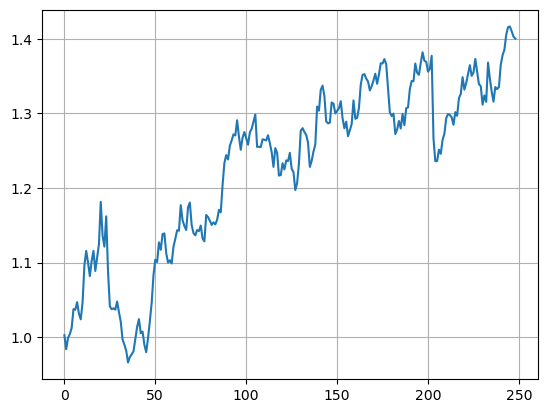

In [12]:
exaple_portfolio = (0.2 * gold_ret + 0.8 * google_ret) + 1
plt.grid(True)
plt.plot(np.cumprod(exaple_portfolio));

In [13]:
num_paths = 100000
start = np.ones([num_paths, 1])

gold_bootstrap_sample = np.random.choice(gold_ret, size=(num_paths, 252), replace=True)
google_bootstrap_sample = np.random.choice(google_ret, size=(num_paths, 252), replace=True)

In [14]:
strategy_bootstrap_sample = 0.8 * google_bootstrap_sample + 0.2 * gold_bootstrap_sample

In [15]:
gold_simulated_paths = np.cumprod(gold_bootstrap_sample + 1, axis=1)
google_simulated_paths = np.cumprod(google_bootstrap_sample + 1, axis=1)
strategy_simulated_paths = np.cumprod(strategy_bootstrap_sample + 1, axis=1)

In [16]:
gold_final_returns = (gold_simulated_paths[:, -1] - 1) * 100
google_final_returns = (google_simulated_paths[:, -1] - 1) * 100
strategy_final_returns = (strategy_simulated_paths[:, -1] - 1) * 100

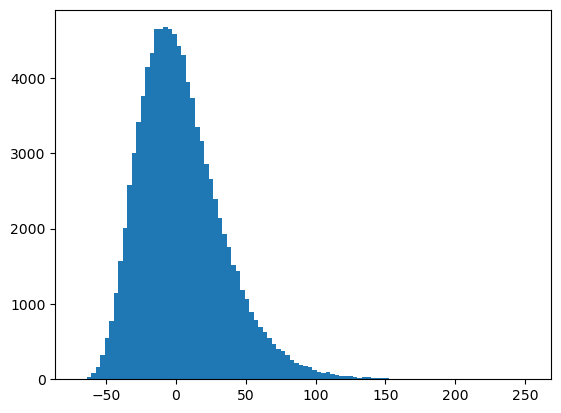

In [17]:
plt.hist(gold_final_returns, 100);

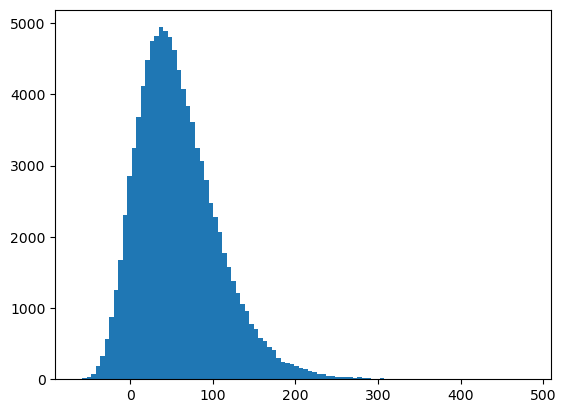

In [18]:
plt.hist(google_final_returns, 100);

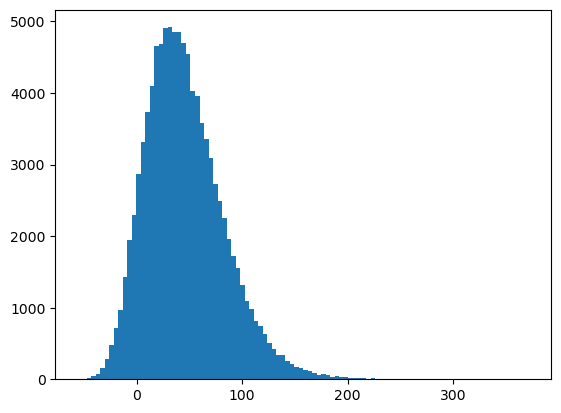

In [19]:
plt.hist(strategy_final_returns, 100);

In [20]:
def plot_cdf(returns, confidence_level = 0.95):
    
    # Calculate empirical CDF
    sorted_returns = np.sort(returns)
    n = len(sorted_returns)
    cdf = np.arange(1, n + 1) / n
    alpha = 1 - confidence_level

    var = np.round(np.percentile(sorted_returns, alpha * 100), 3) # value at risk
    # Plot CDF
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_returns, cdf, marker='.', linestyle='none')
    plt.title(f'Empirical Cumulative Distribution Function (CDF) of Returns; var = {var}')
    plt.xlabel('Final Return %')
    plt.ylabel('Cumulative Probability')
    plt.axhline(y=0.05, color='r', linestyle='--', label=f'{(1 - alpha) * 100}% CI,')
    plt.legend()
    plt.grid(True)
    plt.show()

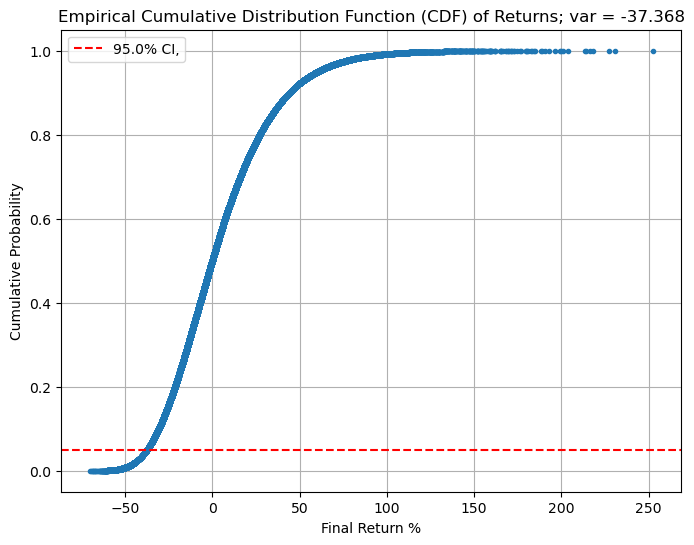

In [21]:
plot_cdf(gold_final_returns)

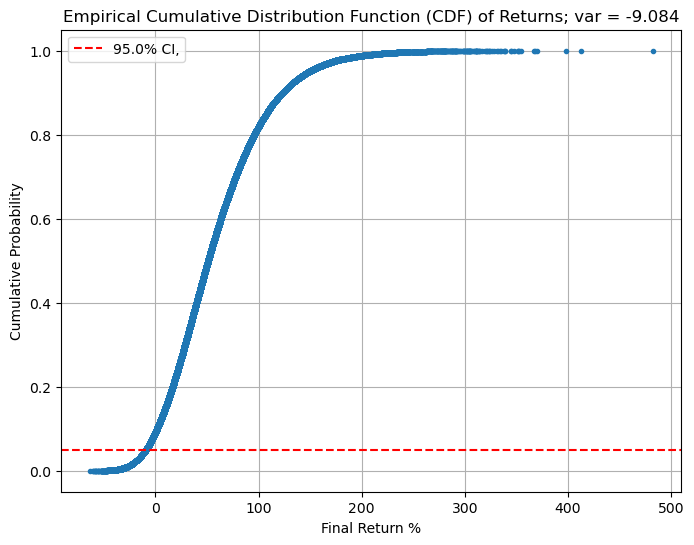

In [22]:
plot_cdf(google_final_returns)

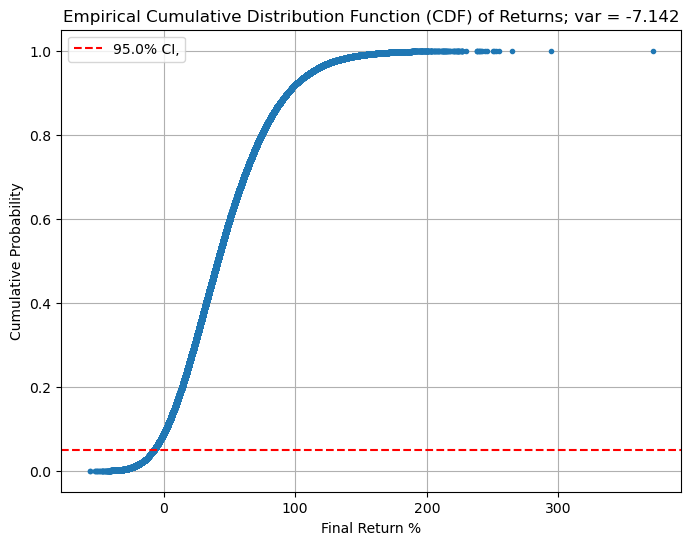

In [23]:
plot_cdf(strategy_final_returns)

In [24]:
CIs = [1, 5, 10, 25, 50, 75, 90, 95, 99]
percentile_returns = [np.round(np.percentile(strategy_final_returns, 100-ci), 2) for ci in CIs]

df_strategy = pd.DataFrame({'Confidence Level (%)': CIs, 'Returns': percentile_returns})
df_strategy

,Confidence Level (%),Returns
0,1,151.39
1,5,112.69
2,10,94.40
3,25,67.44
4,50,41.17
5,75,19.03
6,90,1.98
7,95,-7.14
8,99,-22.30


In [25]:
CIs = [1, 5, 10, 25, 50, 75, 90, 95, 99]
percentile_returns = [np.round(np.percentile(gold_final_returns, 100-ci), 2) for ci in CIs]

df_gold = pd.DataFrame({'Confidence Level (%)': CIs, 'Returns': percentile_returns})
df_gold

,Confidence Level (%),Returns
0,1,95.23
1,5,60.32
2,10,44.25
3,25,21.18
4,50,-0.05
5,75,-17.54
6,90,-30.71
7,95,-37.37
8,99,-48.52


In [26]:
CIs = [1, 5, 10, 25, 50, 75, 90, 95, 99]
percentile_returns = [np.round(np.percentile(google_final_returns, 100-ci), 2) for ci in CIs]

df_google = pd.DataFrame({'Confidence Level (%)': CIs, 'Returns': percentile_returns})
df_google

,Confidence Level (%),Returns
0,1,205.83
1,5,148.70
2,10,123.16
3,25,86.08
4,50,51.11
5,75,22.84
6,90,1.56
7,95,-9.08
8,99,-26.95
